# Análise Exploratória dos Dados

### Importando as bibliotecas

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

### Carregamento dos Dados

In [50]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

train.head()

,id,title,text,subject,date,label
0,13355,"Exclusive: Pentagon, Lockheed near deal on $9 ...",WASHINGTON (Reuters) - The U.S. Department of ...,politicsNews,"January 19, 2017",0
1,2113,“HILL”ARIOUS…MUST SEE! IOWA PARADE GOERS Treat...,HILL larious! If this was a Donald Trump pi a...,left-news,"Aug 3, 2016",1
2,27667,Philippine leader says 'no way' he'll do deal ...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"September 9, 2017",0
3,15368,Biden asks U.S. Congress to allow unencumbered...,WASHINGTON (Reuters) - Vice President Joe Bide...,politicsNews,"September 8, 2016",0
4,6934,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,News,"February 6, 2017",1


In [51]:
test.head()

,id,title,text,subject,date
0,5398,Obama’s “CLOCK BOY” Comes Back To Texas…After ...,After 9 Months Of Hard-Core Islam Muslim Cloc...,politics,"Jun 27, 2016"
1,5503,LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...,A group of volunteer soldiers announced this w...,politics,"Jul 25, 2017"
2,23151,Colombia authorizes air raids against dissiden...,BOGOTA (Reuters) - Colombia s armed forces hav...,worldnews,"October 31, 2017"
3,12669,"Timeline: Trump questions then honors ""one Chi...",(Reuters) - U.S. President Donald Trump agreed...,politicsNews,"February 10, 2017"
4,27864,Three policemen killed in Peru in drug-traffic...,LIMA (Reuters) - Three Peruvian policemen were...,worldnews,"September 7, 2017"


### Análise dos Dados

**Distribuição de Classes**: É essencial verificar se o dataset está balanceado. Esperamos identificar se há desproporção entre as classes de notícias verdadeiras e falsas.

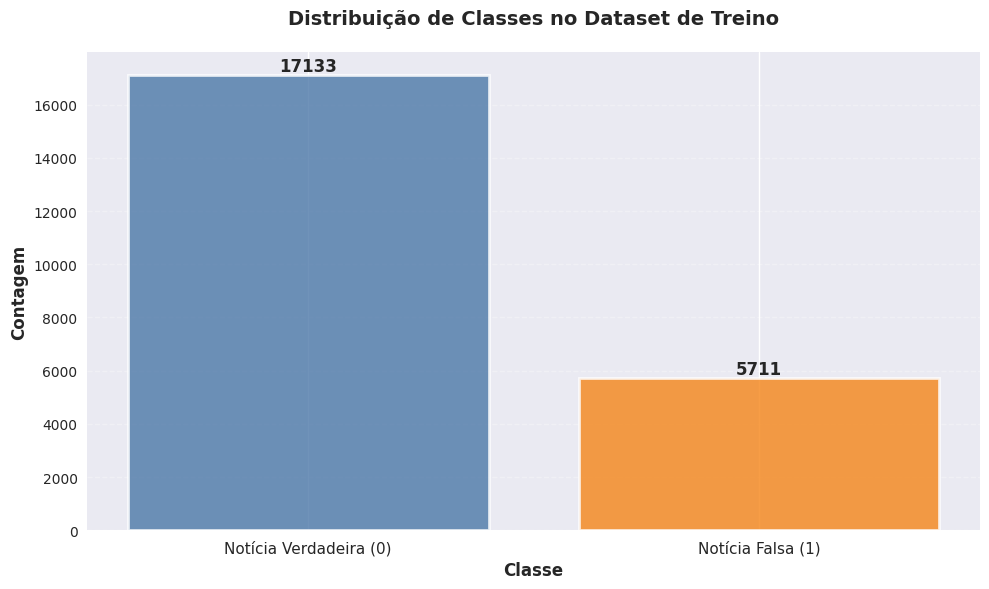

In [52]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(10, 6))

counts = train['label'].value_counts().sort_index()
colors = ['#4C78A8', '#F58518']
bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='white', linewidth=2, alpha=0.8)

ax.set_title('Distribuição de Classes no Dataset de Treino', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Classe', fontsize=12, fontweight='bold')
ax.set_ylabel('Contagem', fontsize=12, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Notícia Verdadeira (0)', 'Notícia Falsa (1)'], fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Verificando se há algum dado faltante.

In [53]:
train.isnull().sum()

id         0
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Verificando se há dados duplicados

In [54]:
train.duplicated().sum()

np.int64(0)

**Distribuição de Tópicos**: Para compreender o contexto dos nossos dados, é importante observar quais tópicos são mais frequentes no dataset e sua cobertura.

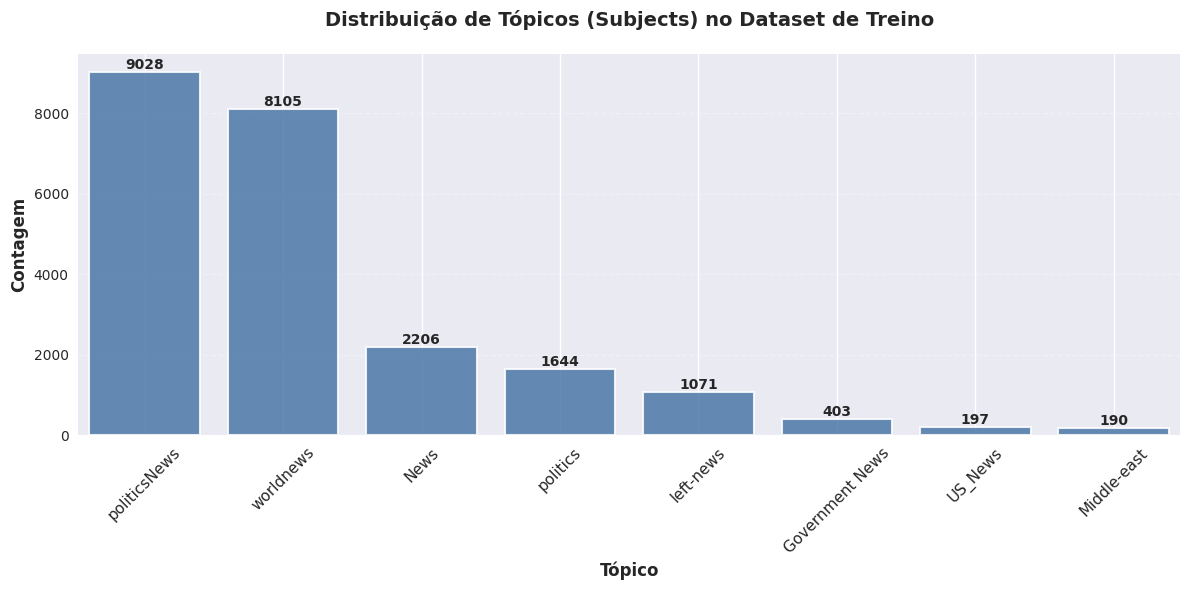

In [55]:
counts = train["subject"].value_counts().sort_values(ascending=False)

plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(counts.index, counts.values, color="#4C78A8", edgecolor='white', linewidth=1.5, alpha=0.85)

ax.set_title("Distribuição de Tópicos (Subjects) no Dataset de Treino", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Tópico", fontsize=12, fontweight='bold')
ax.set_ylabel("Contagem", fontsize=12, fontweight='bold')
ax.grid(axis="y", linestyle="--", alpha=0.3)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.tick_params(axis="x", labelrotation=45, labelsize=11)
ax.margins(x=0.01)
plt.tight_layout()
plt.show()

### Analisando o texto e o título

**Análise de Comprimento**: Verifica-se se há diferença na quantidade de palavras entre as classes. Notícias falsas tendem a ser mais longas?

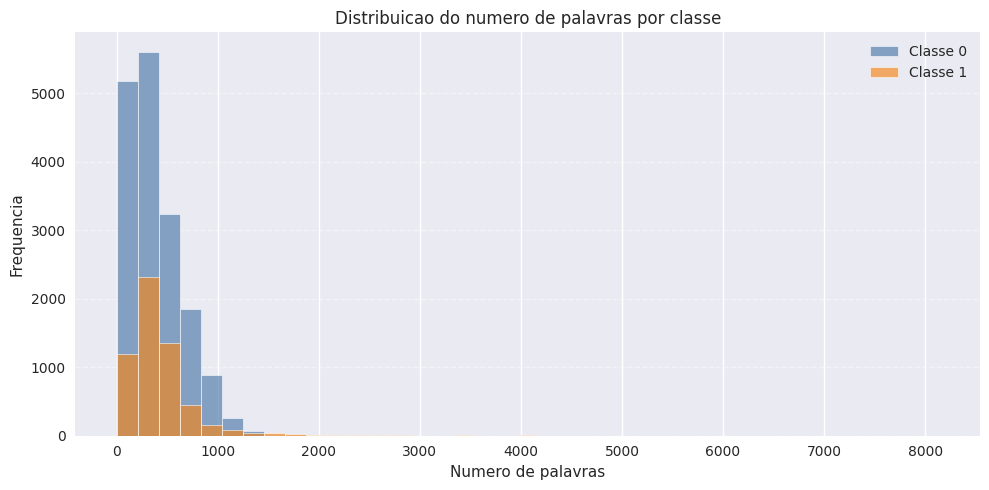

In [56]:
train_0 = train[train["label"] == 0].copy()
train_1 = train[train["label"] == 1].copy()

train_0["num_words"] = train_0["text"].apply(lambda x: len(x.split()))
train_1["num_words"] = train_1["text"].apply(lambda x: len(x.split()))

plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(10, 5))

all_counts = pd.concat([train_0["num_words"], train_1["num_words"]])
bins = np.linspace(all_counts.min(), all_counts.max(), 40)

ax.hist(
    train_0["num_words"],
    bins=bins,
    alpha=0.65,
    label="Classe 0",
    color="#4C78A8",
    edgecolor="white",
    linewidth=0.6,
)
ax.hist(
    train_1["num_words"],
    bins=bins,
    alpha=0.65,
    label="Classe 1",
    color="#F58518",
    edgecolor="white",
    linewidth=0.6,
)

ax.set_title("Distribuicao do numero de palavras por classe")
ax.set_xlabel("Numero de palavras")
ax.set_ylabel("Frequencia")
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend(frameon=False)

plt.tight_layout()
plt.show()

**Análise de Títulos**: A mesma análise é feita para os títulos. Observa-se uma diferença clara: títulos de notícias falsas tendem a ser mais longos.

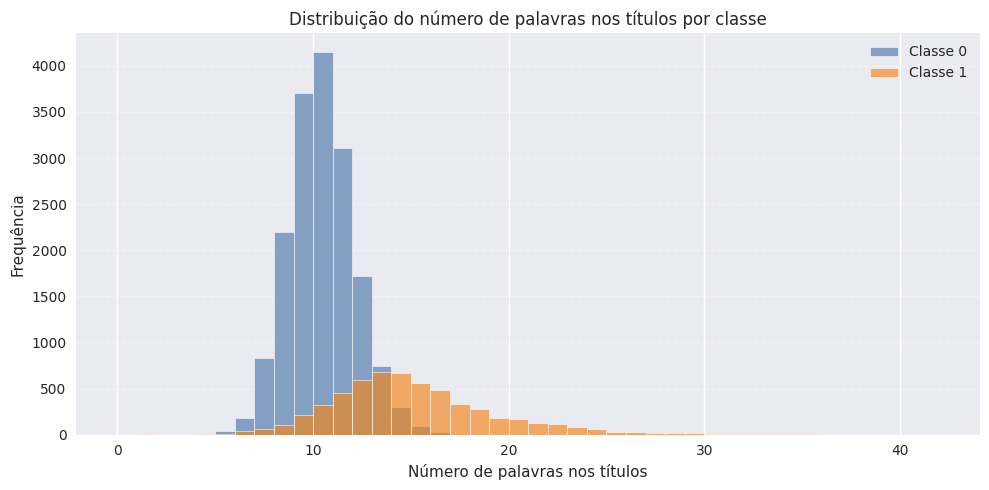

In [57]:
train_0["num_words_title"] = train_0["title"].apply(lambda x: len(x.split()))
train_1["num_words_title"] = train_1["title"].apply(lambda x: len(x.split()))

plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(10, 5))
all_counts_title = pd.concat([train_0["num_words_title"], train_1["num_words_title"]])
bins_title = np.arange(0, all_counts_title.max() + 1, 1)
ax.hist(
    train_0["num_words_title"],
    bins=bins_title,
    alpha=0.65,
    label="Classe 0",
    color="#4C78A8",
    edgecolor="white",
    linewidth=0.6,
)
ax.hist(
    train_1["num_words_title"],
    bins=bins_title,
    alpha=0.65,
    label="Classe 1",
    color="#F58518",
    edgecolor="white",
    linewidth=0.6,
)
ax.set_title("Distribuição do número de palavras nos títulos por classe")
ax.set_xlabel("Número de palavras nos títulos")
ax.set_ylabel("Frequência")
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

**Palavras Mais Frequentes**: Para identificar padrões distintivos, analisa-se quais palavras aparecem com maior frequência em cada classe. Isso pode revelar temas ou vocabulário típicos das fake news.

In [58]:
def plot_top_words(texts, label, n=20):
    vectorizer = CountVectorizer(stop_words="english")
    X = vectorizer.fit_transform(texts)
    word_counts = np.asarray(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    word_freq = dict(zip(vocab, word_counts))
    top_words = Counter(word_freq).most_common(n)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color="#4C78A8" if label == 0 else "#F58518")
    plt.title(f"Top {n} palavras mais comuns na classe {label}")
    plt.xlabel("Palavras")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

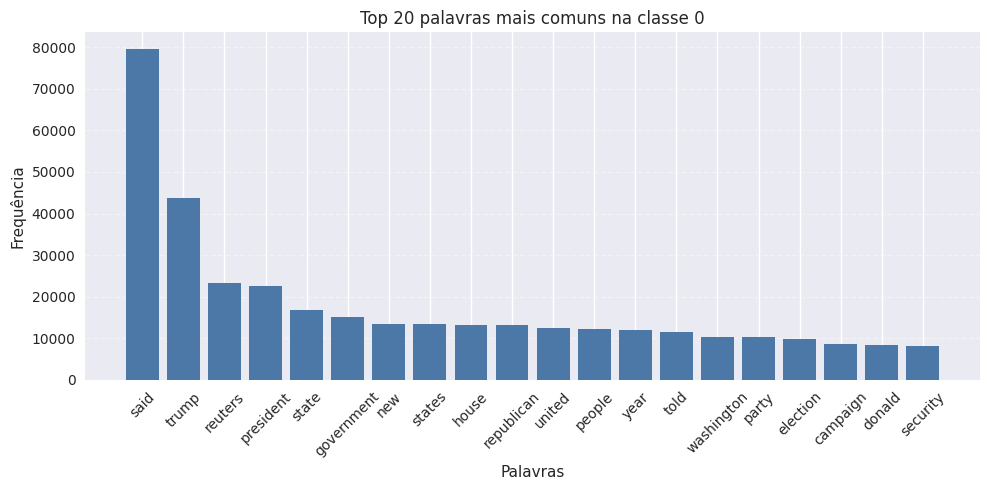

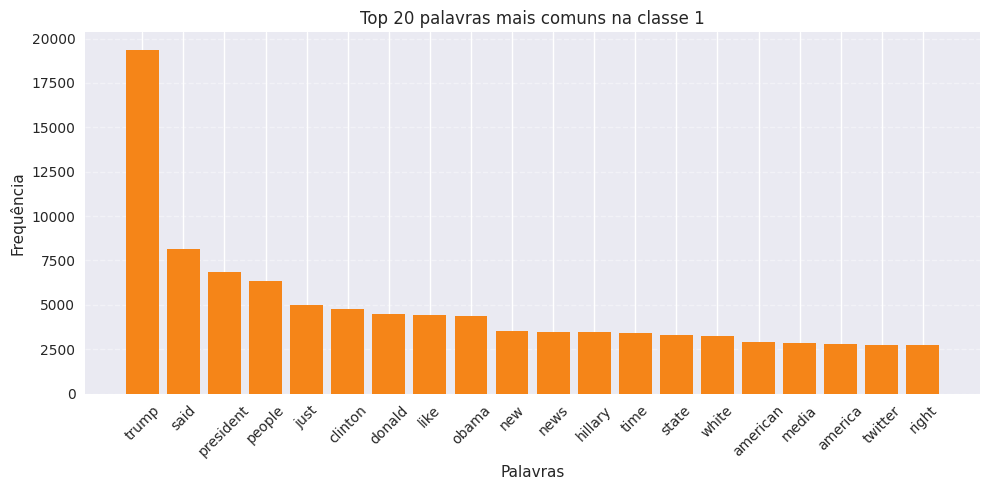

In [59]:
plot_top_words(train_0["text"], label=0)
plot_top_words(train_1["text"], label=1)

A mesma análise de quantidade de palavras foi feita para os títulos

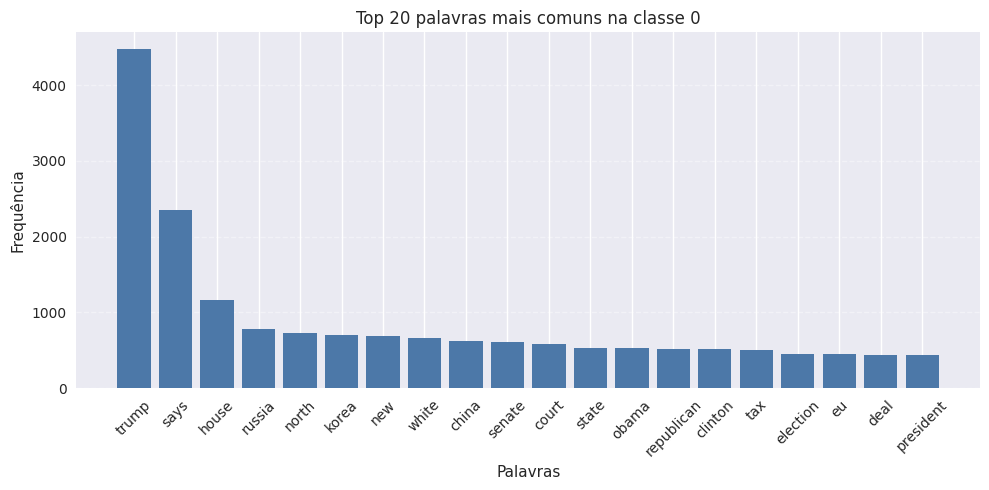

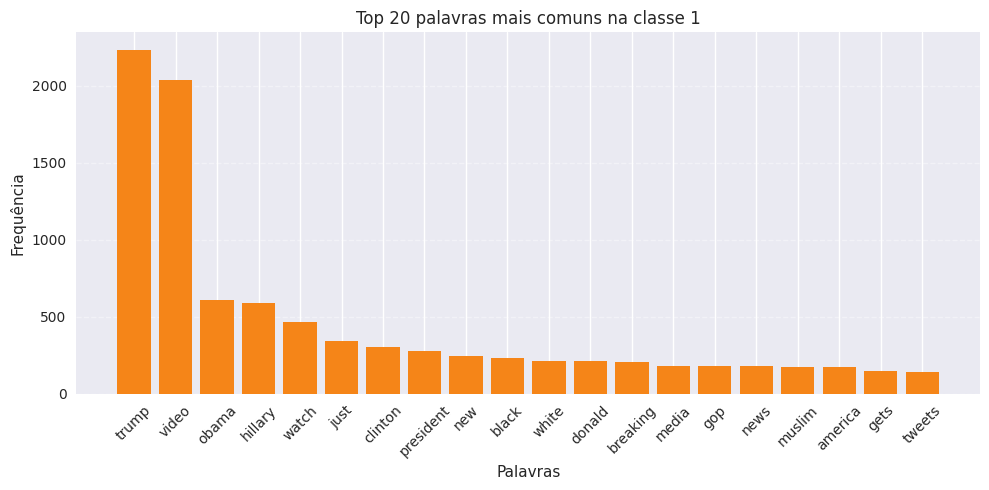

In [60]:
plot_top_words(train_0["title"], label=0)
plot_top_words(train_1["title"], label=1)

**Padrões de Pontuação**: Fake news frequentemente utilizam pontuações exageradas (!, ?, ...) para chamar atenção e gerar engajamento. Verifica-se se há diferença significativa entre as classes.

In [61]:
# Análise de padrões de pontuação e sinais por classe
def plot_signal_counts_comparison(column='text', title_prefix='Texto'):
    exclamation_0 = sum(1 for text in train_0[column] if "!" in text)
    question_0 = sum(1 for text in train_0[column] if "?" in text)
    ellipsis_0 = sum(1 for text in train_0[column] if "..." in text)
    
    exclamation_1 = sum(1 for text in train_1[column] if "!" in text)
    question_1 = sum(1 for text in train_1[column] if "?" in text)
    ellipsis_1 = sum(1 for text in train_1[column] if "..." in text)

    signals = ["Exclamação", "Interrogação", "Reticências"]
    counts_0 = [exclamation_0, question_0, ellipsis_0]
    counts_1 = [exclamation_1, question_1, ellipsis_1]
    
    # Calcular percentuais
    pct_0 = [count / len(train_0) * 100 for count in counts_0]
    pct_1 = [count / len(train_1) * 100 for count in counts_1]

    plt.style.use("seaborn-v0_8")
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = np.arange(len(signals))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, pct_0, width, label=f'Classe 0 (Verdadeira) - {len(train_0)} notícias', 
                   color='#4C78A8', edgecolor='white', linewidth=1.5, alpha=0.85)
    bars2 = ax.bar(x + width/2, pct_1, width, label=f'Classe 1 (Falsa) - {len(train_1)} notícias', 
                   color='#F58518', edgecolor='white', linewidth=1.5, alpha=0.85)
    
    # Adicionar valores e percentuais nas barras
    for i, (bar, count, pct) in enumerate(zip(bars1, counts_0, pct_0)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    for i, (bar, count, pct) in enumerate(zip(bars2, counts_1, pct_1)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_title(f'Comparação de Padrões de Pontuação no {title_prefix}', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Percentual (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Tipo de Sinal', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(signals, fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.legend(frameon=False, fontsize=11, loc='upper right')
    
    plt.tight_layout()
    plt.show()

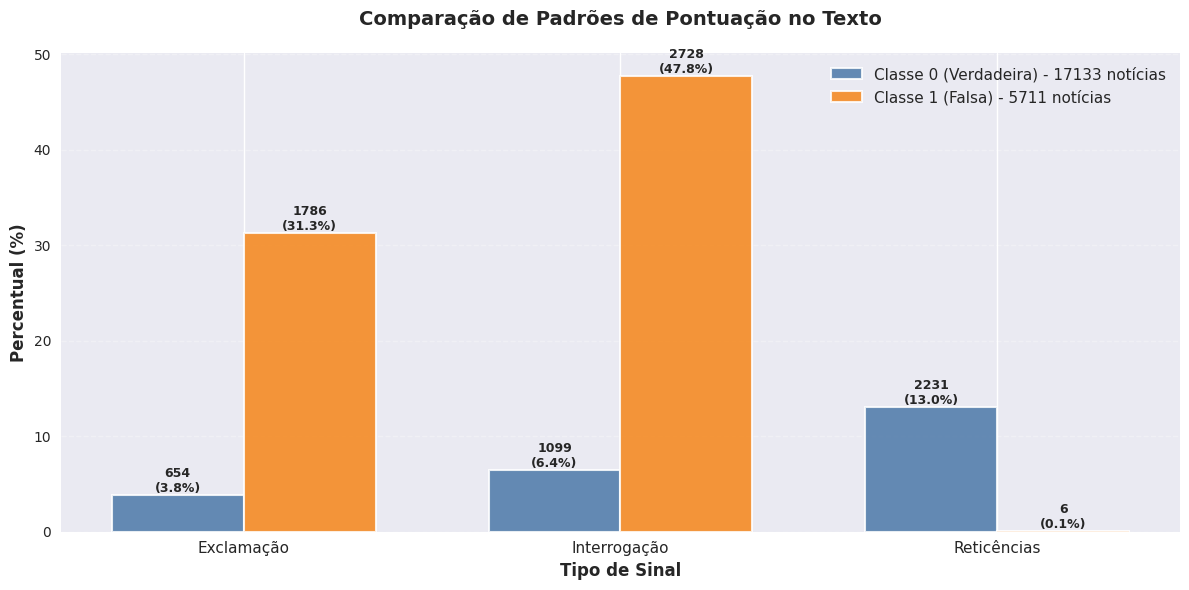

In [62]:
plot_signal_counts_comparison(column='text', title_prefix='Texto')

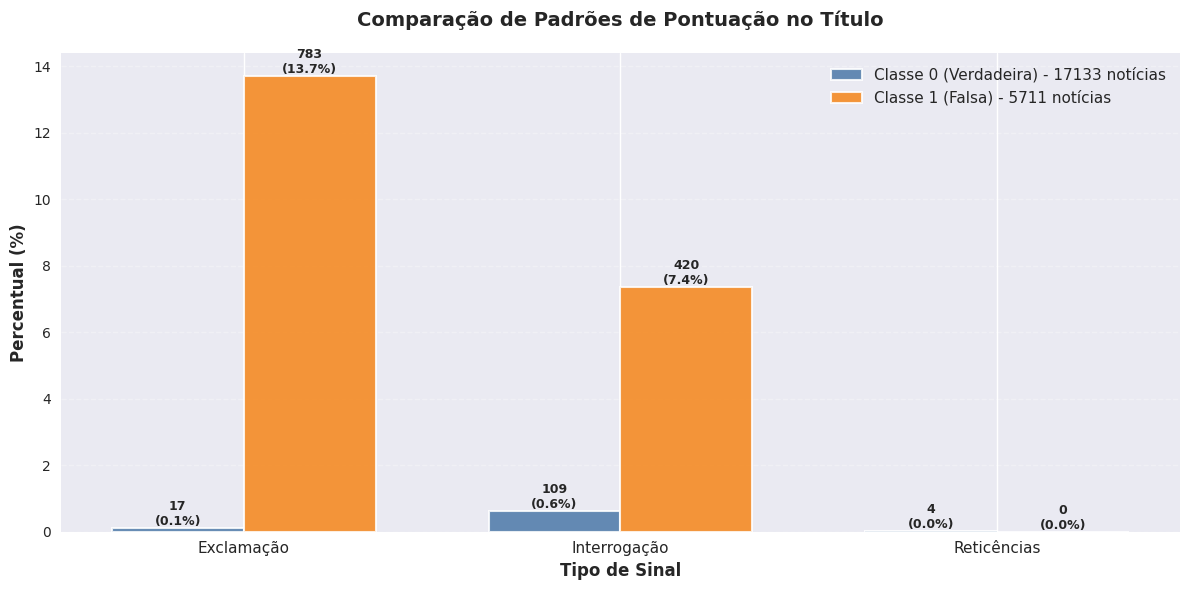

In [63]:
plot_signal_counts_comparison(column='title', title_prefix='Título')

**Observações**: Pelos gráficos acima, fica nítido que notícias falsas realmente utilizam muito mais pontuações. Além disso, números muito exagerados também podem indicar conteúdo falso, portanto é importante validar essas hipóteses.

In [64]:
def plot_number_patterns_comparison(column='text', title_prefix='Texto'):
    import re
    
    # Contar padrões numéricos
    has_numbers_0 = sum(1 for text in train_0[column] if any(char.isdigit() for char in text))
    has_numbers_1 = sum(1 for text in train_1[column] if any(char.isdigit() for char in text))
    
    # Contar anos (padrão de 4 dígitos)
    has_years_0 = sum(1 for text in train_0[column] if re.search(r'\b(19|20)\d{2}\b', text))
    has_years_1 = sum(1 for text in train_1[column] if re.search(r'\b(19|20)\d{2}\b', text))
    
    # Contar percentuais
    has_percent_0 = sum(1 for text in train_0[column] if '%' in text)
    has_percent_1 = sum(1 for text in train_1[column] if '%' in text)

    patterns = ["Contém Números", "Contém Anos", "Contém Percentuais"]
    counts_0 = [has_numbers_0, has_years_0, has_percent_0]
    counts_1 = [has_numbers_1, has_years_1, has_percent_1]
    
    # Calcular percentuais
    pct_0 = [count / len(train_0) * 100 for count in counts_0]
    pct_1 = [count / len(train_1) * 100 for count in counts_1]

    plt.style.use("seaborn-v0_8")
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = np.arange(len(patterns))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, pct_0, width, label=f'Classe 0 (Verdadeira) - {len(train_0)} notícias', 
                   color='#4C78A8', edgecolor='white', linewidth=1.5, alpha=0.85)
    bars2 = ax.bar(x + width/2, pct_1, width, label=f'Classe 1 (Falsa) - {len(train_1)} notícias', 
                   color='#F58518', edgecolor='white', linewidth=1.5, alpha=0.85)
    
    # Adicionar valores e percentuais nas barras
    for i, (bar, count, pct) in enumerate(zip(bars1, counts_0, pct_0)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    for i, (bar, count, pct) in enumerate(zip(bars2, counts_1, pct_1)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_title(f'Comparação de Padrões Numéricos no {title_prefix}', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Percentual (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Tipo de Padrão', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(patterns, fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.legend(frameon=False, fontsize=11, loc='upper right')
    
    plt.tight_layout()
    plt.show()

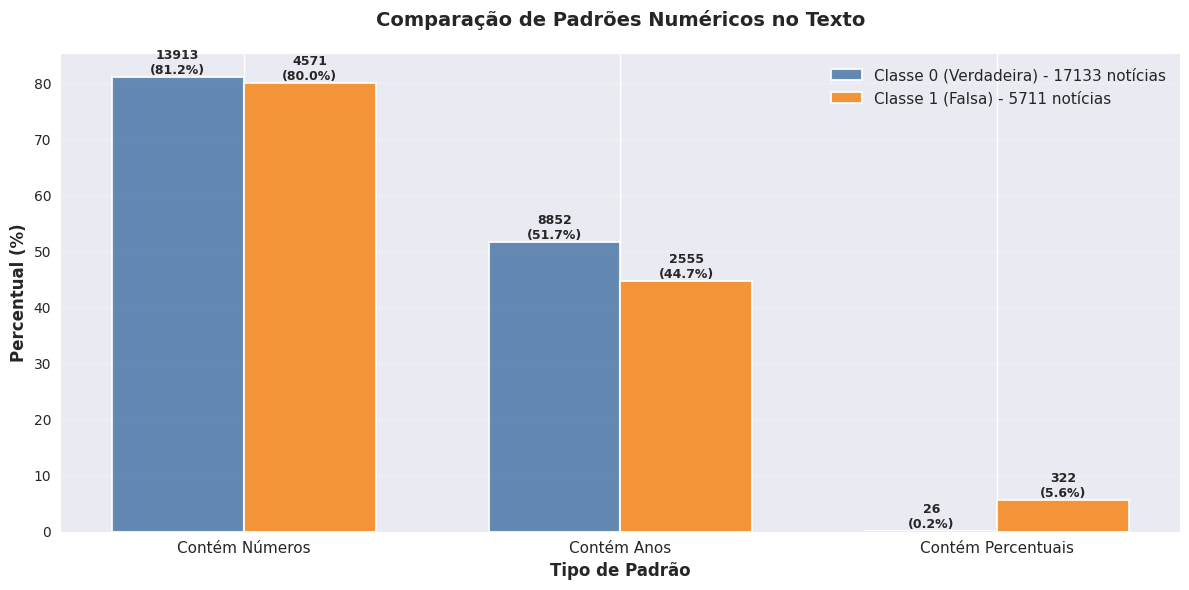

In [65]:
plot_number_patterns_comparison(column='text', title_prefix='Texto')

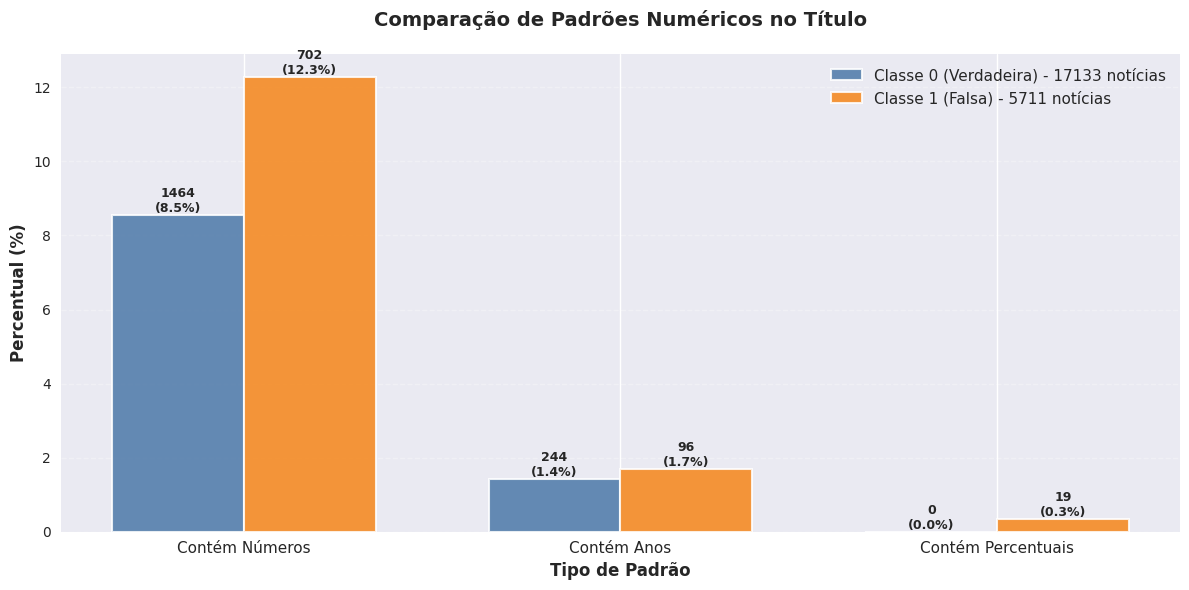

In [66]:
plot_number_patterns_comparison(column='title', title_prefix='Título')

**Padrões Numéricos**: Enquanto os textos apresentam distribuições similares de números, os títulos mostram uma diferença notável. A presença de números, anos e percentuais pode ser um indicador importante.